# TP4 - Le déclenchement de la Commune de Paris vu par les journaux belges

# Interrogation de Wikidata à l'aide de requêtes SPARQL
Qui furent les communards?

## Imports

In [1]:
from datetime import datetime as dt
from SPARQLWrapper import SPARQLWrapper, JSON

## Obtenir la liste des communards
Nous observons que pour certains, un identifiant est affiché au lieu du nom. Cela peut arriver s'il n'y a pas de label en anglais, comme par exemple pour Pelagia Dąbrowska née Zgliczyńska, Q110918322

In [3]:
# Retrieve results from SPARQL
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
sparql = SPARQLWrapper(endpoint)

# P31 = instance of 
# Q5 = human
# P106 = Opccupation
# Q1780490 = communard
statement = """
SELECT DISTINCT ?person ?personLabel  WHERE {
    ?person wdt:P106 wd:Q1780490 .
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" . }
}
ORDER BY ?personLabel
"""

sparql.setQuery(statement)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

rows = results['results']['bindings']
print(f"\n{len(rows)} communards trouvés dans Wikidata\n")
print(rows[:2])


295 communards trouvés dans Wikidata

[{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q110918322'}, 'personLabel': {'type': 'literal', 'value': 'Q110918322'}}, {'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q115179017'}, 'personLabel': {'type': 'literal', 'value': 'Q115179017'}}]


In [4]:
max_results = 50

filtered_rows = [row for row in rows ]
print(f"Displaying the first {max_results}:\n")
for row in filtered_rows[:max_results]:
      print(f"{row['personLabel']['value']} ")

Displaying the first 50:

Q110918322 
Q115179017 
Q115257367 
Q115257377 
Achille Ballière 
Adolf Rozwadowski 
Adolphe Assi 
Adolphe Clémence 
Adrien Lejeune 
Adèle Esquiros 
Adélaïde Valentin 
Aglaé Jarry 
Aimée Delvainquier 
Albert Regnard 
Albert Theisz 
Alexandre Girault 
Alexis Louis Trinquet 
Alfred-Édouard Billioray 
Alice Bontemps 
Aline Jacquier 
Alix Payen 
Alphonse Humbert 
Alphonse Nicolas Lonclas 
Amilcare Cipriani 
Aminthe Dupont 
Amélie Payen 
André Bastelica 
André Gill 
André Slomszynski 
Angelina Courcelles 
Angelina Sabatier 
Anna Henryka Pustowojtowna 
Anna Joubert 
Anna Maillet 
Anne-Marie Ménand 
Antoine Demay 
Antoinette Legai 
Antonin Desfarges 
Aristide Claris 
Armand Antoine Jules Arnaud 
Armand Félix Marie Jobbé-Duval 
Arthur 
Arthur Arnould 
Arthur Ranc 
Auguste Adolphe Okolowicz 
Auguste Durassier 
Auguste Serraillier 
Auguste Sicard 
Auguste Viard 
Auguste-Jean-Marie Vermorel 


# Préparation du corpus

## Corpus général
Nous stockons le contenu de toutes les pages sélectionnées dans le fichier TP4.txt

In [5]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_path = '../data/TP4data'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) ]
len(txts)

292

In [6]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [7]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

292

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## L'Indépendance Belge
Nous stockons les pages extraites du journal "L'Indépendance Belge" dans un fichier TP4_1_Indep.txt

In [9]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_1_path = '../data/TP4_1_Indep'
txts_1 = [f for f in os.listdir(txt_1_path) if os.path.isfile(os.path.join(txt_1_path, f)) ]
len(txts_1)

98

In [10]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts_1:
    with open(os.path.join(txt_1_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [12]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4_1_Indep.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Le Journal de Bruxelles
Nous stockons les pages extraites du "Journal de Bruxelles" dans un fichier TP4_2_Brux.txt

In [13]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_2_path = '../data/TP4_2_Brux'
txts_2 = [f for f in os.listdir(txt_2_path) if os.path.isfile(os.path.join(txt_2_path, f)) ]
len(txts_2)

83

In [14]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts_2:
    with open(os.path.join(txt_2_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [15]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4_2_Brux.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Le Journal de Charleroi
Nous stockons les pages extraites du "Journal de Charleroi" dans un fichier TP4_3_Charl.txt

In [16]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_3_path = '../data/TP4_3_Charl'
txts_3 = [f for f in os.listdir(txt_3_path) if os.path.isfile(os.path.join(txt_3_path, f)) ]
len(txts_3)

65

In [17]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts_3:
    with open(os.path.join(txt_3_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [18]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4_3_Charl.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## La Meuse
Nous stockons les pages extraites de "La Meuse" dans un fichier TP4_4_Meuse.txt

In [19]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_4_path = '../data/TP4_4_Meuse'
txts_4 = [f for f in os.listdir(txt_4_path) if os.path.isfile(os.path.join(txt_4_path, f)) ]
len(txts_4)

46

In [20]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts_4:
    with open(os.path.join(txt_4_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [21]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4_4_Meuse.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

# Exploitation du corpus

## Analyse de la distribution du vocabulaire

### Imports

In [22]:
import os
import yake

### Extraire les mots clés d'un document avec Yake

In [23]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [24]:
# Lister les Fichiers
txt_path = "../data/TP4data/"
files = os.listdir(txt_path)

### Imports et stopwords

In [25]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaeld\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Stopwords (mis à jour itérativement)
sw = stopwords.words("french")
sw += ["ainsi", "après", "aucun", "aucune", "aujourd", "hui", "aussi", "autre", "autres", "avant", "avoir",  "bien", 
       "cela","celle", "cet", "cette", "comme", "chaque", "contre", "déjà", "depuis", "dès", "deux", "dire", "dit", 
       "doit", "donc", "dont", "élé", "elle", "elles", "encore", "entre", "être", 
       "faire", "fait", "faut",  "grand", "heures", "hier",  "ils",  "les", "leurs", "moins", "non","pendant", 
       "peut","plus", "plusieurs", "près", "peu", "quand", "quelques", "rien",  "sans", "sous", "toujours", 
       "tous", "tout", "toute", "toutes", "très", "trois",         
       "trop", "vers", "etc"]
sw = set(sw)


### Définir une fonction de nettoyage

In [27]:
year = 1870
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"TP4.txt"
        output_path = f"TP4_clean.txt"
    else:
        input_path = f"{folder}/TP4.txt"
        output_path = f"{folder}/TP4_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet 

In [28]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/TP4_clean.txt!'

In [29]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'TP4_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TIQUE RÉVOLUTIONNAIRE GÉNÉRAL LONT PROUVÉ ATTITUDE CIRCONSTANCES RÉCENTES COMPRENDS HOMMES REPRÉSENTENT MANIÈRE LIBRE ÉCLATANTE OPPOSITION LÉGALE CONSTITUTIONNELLE ASSOCIENT POLITIQUE NÉGATION SATIRE PROPRE POLITIQUE AUTANT NÔTRE NOUVELLE APPROBATION VOILÀ PENSÉE VOULAIS EXPRIMER CROIS PRÉSUMER LOYAUTÉ JULES FAVRE ESPÉRANT EXPLICATION PLUTÔT ACHÈVEMENT PHRASE REGRETTERA MOT CALOMNIE LEQUEL DEVANCÉ PENSÉE EXPRIMÉE PRIS PAROLE QUOIQU AGIT INCIDENT PARÉE FERMEMENT DÉCIDÉS PERSISTER VOIE LIBÉRALE LA'

## Nuage de mots

In [56]:
frequencies = Counter(after.split())
print(frequencies.most_common(20))


[('PARIS', 6573), ('GÉNÉRAL', 3223), ('GOUVERNEMENT', 3084), ('COMMUNE', 2551), ('VERSAILLES', 2345), ('FRANCE', 2268), ('VILLE', 2229), ('ORDRE', 1864), ('NATIONALE', 1782), ('GARDE', 1718), ('GUERRE', 1699), ('ARMÉE', 1647), ('ASSEMBLÉE', 1624), ('HOMMES', 1560), ('PLACE', 1534), ('JOUR', 1528), ('RUE', 1526), ('MARS', 1506), ('JUSQU', 1489), ('COMITÉ', 1458)]


In [57]:
frequencies = Counter(after.split())
print(frequencies.most_common(200))

[('PARIS', 6573), ('GÉNÉRAL', 3223), ('GOUVERNEMENT', 3084), ('COMMUNE', 2551), ('VERSAILLES', 2345), ('FRANCE', 2268), ('VILLE', 2229), ('ORDRE', 1864), ('NATIONALE', 1782), ('GARDE', 1718), ('GUERRE', 1699), ('ARMÉE', 1647), ('ASSEMBLÉE', 1624), ('HOMMES', 1560), ('PLACE', 1534), ('JOUR', 1528), ('RUE', 1526), ('MARS', 1506), ('JUSQU', 1489), ('COMITÉ', 1458), ('QUO', 1452), ('SAINT', 1437), ('LOI', 1371), ('SOIR', 1357), ('JOURNAL', 1314), ('MATIN', 1304), ('LIEU', 1296), ('MOMENT', 1292), ('TEMPS', 1289), ('MINISTRE', 1278), ('JOURS', 1252), ('GARDES', 1226), ('NOMBRE', 1218), ('GRANDE', 1217), ('POINT', 1208), ('TROUPES', 1186), ('MAI', 1183), ('CEUX', 1163), ('POUVOIR', 1149), ('THIERS', 1148), ('FORT', 1146), ('CHEF', 1136), ('PAYS', 1085), ('CONSEIL', 1062), ('RÉPUBLIQUE', 1057), ('FRANÇAIS', 1041), ('LOS', 1031), ('DROIT', 1016), ('NATIONAUX', 1014), ('VIENT', 1008), ('CORPS', 995), ('PRÉSIDENT', 992), ('DEVANT', 992), ('AVRIL', 980), ('UNO', 977), ('MEMBRES', 966), ('COMMISSI

### Créer, stocker et afficher le nuage de mots

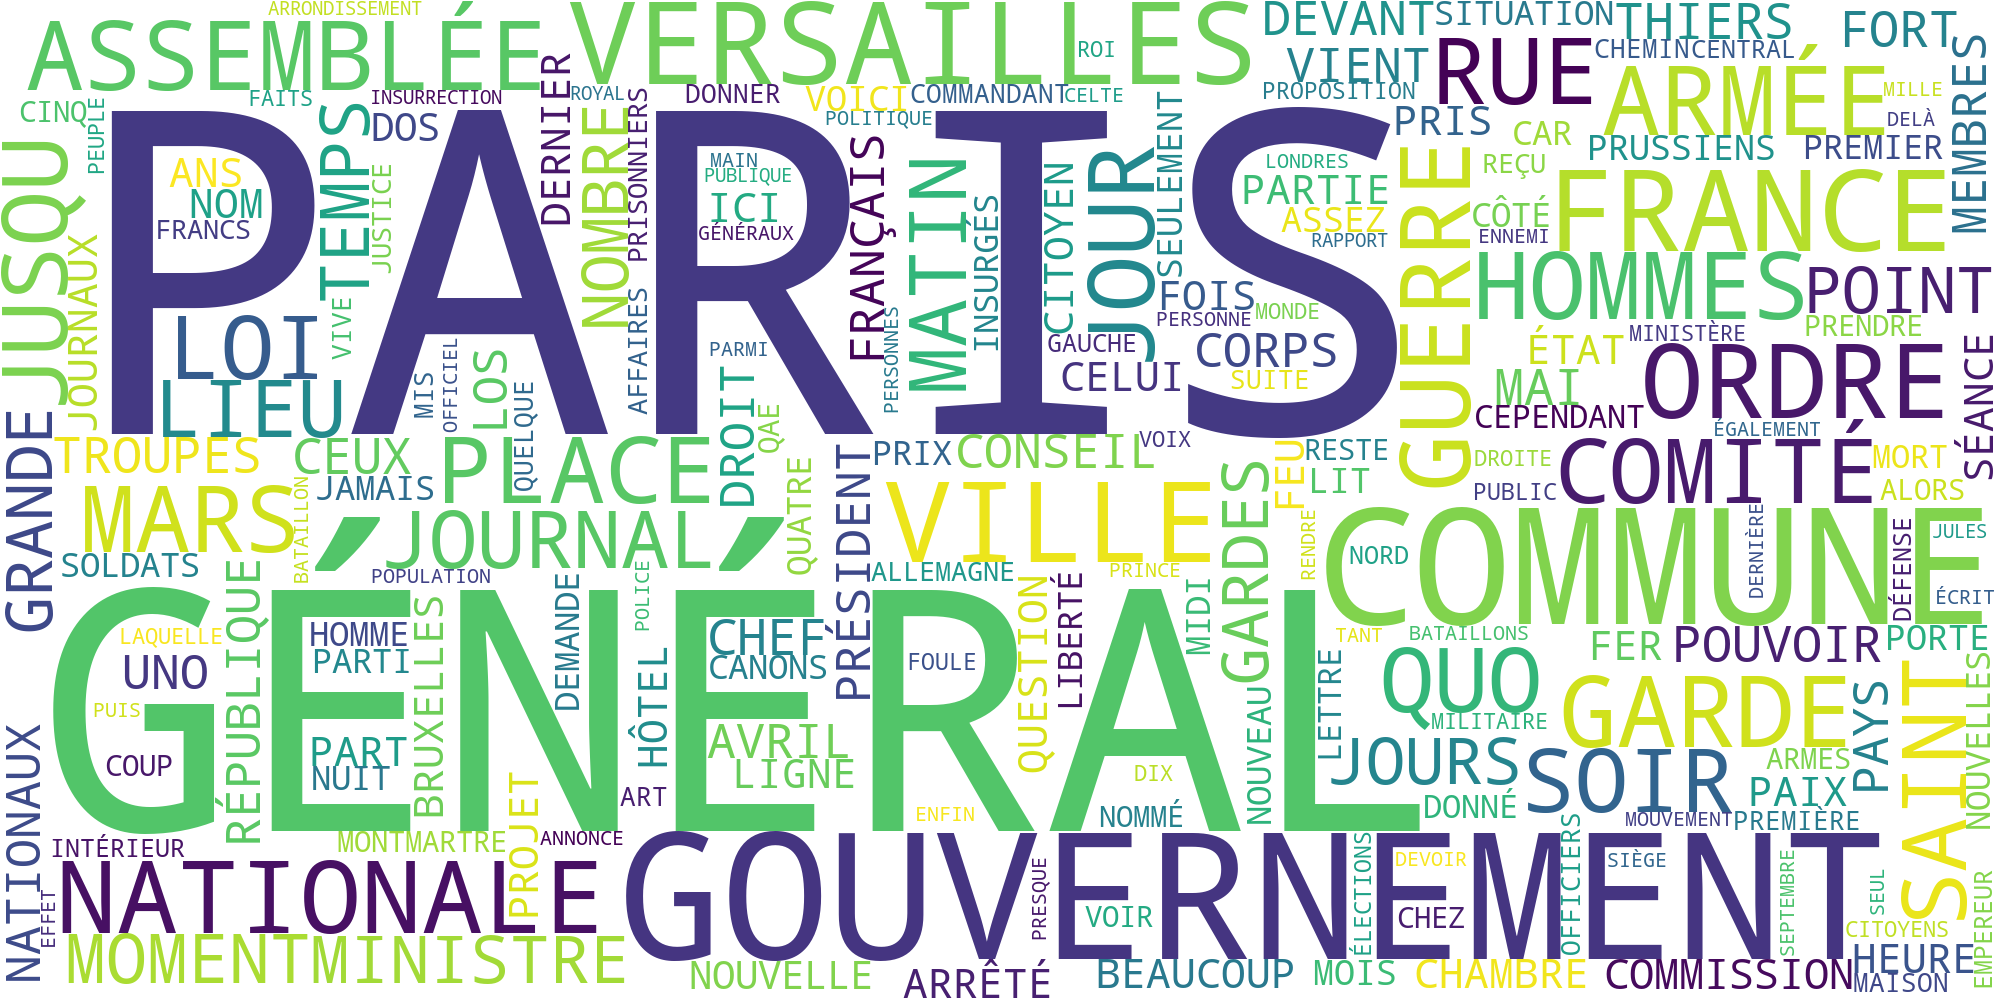

In [31]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Bigrammes de mots-clé par journal

### L'Indépendance Belge

In [32]:
# Charger le texte
n=100000
text = open("../data/tmp/TP4_1_Indep.txt", encoding='utf-8').read()[:n]

In [36]:
# L'Indépendance Belge
keywords = kw_extractor.extract_keywords(text)
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['président Schneider',
 'Jules Favre',
 "dit qu'il",
 'gouvernement français',
 'droits politiques']

### Le Journal de Bruxelles

In [37]:
# Charger le texte
n=100000
text = open("../data/tmp/TP4_2_Brux.txt", encoding='utf-8').read()[:n]

In [38]:
# Journal de Bruxelles
keywords = kw_extractor.extract_keywords(text)
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['grand nombre', 'Journal officiel', "dit qu'il"]

### Le Journal de Charleroi

In [39]:
# Charger le texte
n=100000
text = open("../data/tmp/TP4_3_Charl.txt", encoding='utf-8').read()[:n]

In [40]:
# Journal de Charleroi
keywords = kw_extractor.extract_keywords(text)
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['général prussien',
 'gardes mobiles',
 'garde nationale',
 "dit qu'il",
 'fausse nouvelle']

### La Meuse

In [41]:
# Charger le texte
n=100000
text = open("../data/tmp/TP4_4_Meuse.txt", encoding='utf-8').read()[:n]

In [42]:
# La Meuse
keywords = kw_extractor.extract_keywords(text)
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Jules Ferry',
 'maréchal Mac-Mahon',
 'grande victoire',
 "corps d'armée",
 "L'armée française",
 'prince royal']

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [43]:
# copie de s3_ner.ipynb du module 3
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [44]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur les textes sélectionnés

In [45]:
# Charger le texte
n=100000
text = open("../data/tmp/TP4.txt", encoding='utf-8').read()[:n]

In [46]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 3.09 s
Wall time: 3.17 s


### Personnes

In [47]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [50]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois ")

Jules Favre apparait 8 fois 
M. Pelletan apparait 5 fois 
César apparait 5 fois 
M. le comte Daru apparait 4 fois 
m. jules favre apparait 3 fois 
président Schneider apparait 3 fois 
h. baba apparait 3 fois 
M. le ministre apparait 3 fois 
Daru apparait 3 fois 
M. Rochefort apparait 2 fois 
Reine apparait 2 fois 
Gladstone apparait 2 fois 
Autr apparait 2 fois 
Lots autrich. apparait 2 fois 
Pontife apparait 2 fois 
m. horace apparait 1 fois 
M. Rolle apparait 1 fois 
Quanl apparait 1 fois 
Schneider M. Ordinaire apparait 1 fois 
Interrnptions. apparait 1 fois 
M. Ordinaire apparait 1 fois 
H. Rochefort apparait 1 fois 
cala apparait 1 fois 
H LE PRÉSIDENT apparait 1 fois 
H. Ordinaire apparait 1 fois 
H. le président Schneider apparait 1 fois 
Migneret apparait 1 fois 
Philis, conseiller d'Etat apparait 1 fois 
Sont apparait 1 fois 
aiàentrer apparait 1 fois 
ja ma suis apparait 1 fois 
M. Ber- apparait 1 fois 
Armez lu apparait 1 fois 
Matiez apparait 1 fois 
M. Bernier apparait 1 f

### Organisations

In [58]:
# Compter les entités
organis = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organis[ent.text] += 1

In [59]:
# Trier et imprimer

sorted_org = sorted(organis.items(), key=lambda kv: kv[1], reverse=True)

for org, freq in sorted_org[:50]:
    print(f"{org} apparait {freq} fois dans le corpus")

Chambre apparait 15 fois dans le corpus
Parlement apparait 2 fois dans le corpus
Sénat apparait 2 fois dans le corpus
sorlie apparait 1 fois dans le corpus
Bruit apparait 1 fois dans le corpus
Chambro apparait 1 fois dans le corpus
orima apparait 1 fois dans le corpus
Corps législatif d'un projet apparait 1 fois dans le corpus
Comment!. apparait 1 fois dans le corpus
letemp3 apparait 1 fois dans le corpus
PAnis apparait 1 fois dans le corpus
SOCIETE apparait 1 fois dans le corpus
Chambre des Lords apparait 1 fois dans le corpus
Saxonia apparait 1 fois dans le corpus
Banque de Prusse apparait 1 fois dans le corpus
Nestorian apparait 1 fois dans le corpus
DB I-AIU3 apparait 1 fois dans le corpus
SOS 00 apparait 1 fois dans le corpus
Crédit mob apparait 1 fois dans le corpus
Banque atttr. apparait 1 fois dans le corpus
Hiulii do apparait 1 fois dans le corpus
Société apparait 1 fois dans le corpus
Esch sur-1'Alzette apparait 1 fois dans le corpus
ministre d'Etat de Luxembourg apparait 1 f

### Lieux

In [60]:
# Compter les lieux
lieux = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        lieux[ent.text] += 1

In [32]:
# Trier et imprimer

sorted_lieux = sorted(lieux.items(), key=lambda kv: kv[1], reverse=True)

for lieu, freq in sorted_lieux[:50]:
    print(f"{lieu} apparait {freq} fois dans le corpus")

Etat apparait 17 fois dans le corpus
Bruxelles apparait 17 fois dans le corpus
Belgique apparait 15 fois dans le corpus
Congo apparait 9 fois dans le corpus
Brux apparait 8 fois dans le corpus
Gand apparait 5 fois dans le corpus
France apparait 4 fois dans le corpus
Paris apparait 4 fois dans le corpus
état apparait 4 fois dans le corpus
Anvers apparait 3 fois dans le corpus
Ixelles apparait 3 fois dans le corpus
Territoire de l’ancienne commune de apparait 2 fois dans le corpus
de Belgique apparait 2 fois dans le corpus
Etats-Unis apparait 2 fois dans le corpus
Luxembourg apparait 2 fois dans le corpus
Angleterre apparait 2 fois dans le corpus
théâtre du Parc apparait 2 fois dans le corpus
Hollywood apparait 2 fois dans le corpus
Vienne apparait 2 fois dans le corpus
Brabant apparait 2 fois dans le corpus
Samedi apparait 2 fois dans le corpus
Uccle apparait 2 fois dans le corpus
rue de la Concorde apparait 2 fois dans le corpus
Panama apparait 2 fois dans le corpus
Mons apparait 2 foi

### Personnes par journal

In [61]:
# L'Indépendance Belge
n=100000
text = open("../data/tmp/TP4_1_Indep.txt", encoding='utf-8').read()[:n]

In [62]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 2.02 s
Wall time: 2.02 s


In [63]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [64]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois ")

Jules Favre apparait 8 fois 
M. Pelletan apparait 5 fois 
César apparait 5 fois 
M. le comte Daru apparait 4 fois 
m. jules favre apparait 3 fois 
président Schneider apparait 3 fois 
h. baba apparait 3 fois 
M. le ministre apparait 3 fois 
Daru apparait 3 fois 
M. Rochefort apparait 2 fois 
Reine apparait 2 fois 
Gladstone apparait 2 fois 
Autr apparait 2 fois 
Lots autrich. apparait 2 fois 
Pontife apparait 2 fois 
m. horace apparait 1 fois 
M. Rolle apparait 1 fois 
Quanl apparait 1 fois 
Schneider M. Ordinaire apparait 1 fois 
Interrnptions. apparait 1 fois 
M. Ordinaire apparait 1 fois 
H. Rochefort apparait 1 fois 
cala apparait 1 fois 
H LE PRÉSIDENT apparait 1 fois 
H. Ordinaire apparait 1 fois 
H. le président Schneider apparait 1 fois 
Migneret apparait 1 fois 
Philis, conseiller d'Etat apparait 1 fois 
Sont apparait 1 fois 
aiàentrer apparait 1 fois 
ja ma suis apparait 1 fois 
M. Ber- apparait 1 fois 
Armez lu apparait 1 fois 
Matiez apparait 1 fois 
M. Bernier apparait 1 f

In [65]:
# Le Journal de Bruxelles
n=100000
text = open("../data/tmp/TP4_2_Brux.txt", encoding='utf-8').read()[:n]

In [66]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 3.38 s
Wall time: 3.4 s


In [67]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [68]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois ")

M. Gambetta apparait 4 fois 
l'Empereur apparait 4 fois 
Tropmann apparait 3 fois 
Smout apparait 3 fois 
Flourens apparait 3 fois 
M. Schneider apparait 2 fois 
M. Louvet apparait 2 fois 
Johnston apparait 2 fois 
Gambetta apparait 2 fois 
François Vankerckhoven apparait 2 fois 
Jérôme Schols apparait 2 fois 
M. Crémieux apparait 2 fois 
M. Chevandier de Valdrôme apparait 2 fois 
M. Piétri apparait 2 fois 
M. Daru apparait 2 fois 
Jenart apparait 2 fois 
Pie IX apparait 2 fois 
M. Schneider cito apparait 1 fois 
M. le ministre du commerce apparait 1 fois 
H. Picard apparait 1 fois 
Quesné apparait 1 fois 
M. Estancclin apparait 1 fois 
M. Ràspafl apparait 1 fois 
r d'hofiuni apparait 1 fois 
M. Haussmâtfrii. apparait 1 fois 
élé impossible-de apparait 1 fois 
osr M. apparait 1 fois 
fiçm apparait 1 fois 
sieur D apparait 1 fois 
x.f.- S. -•- t \l-._,.e..,-SL\'ec2ix apparait 1 fois 
M. Frèren'eùt apparait 1 fois 
Siuets apparait 1 fois 
M. Bara apparait 1 fois 
Jcles Bara apparait 1 fo

In [69]:
# Le Journal de Charleroi
n=100000
text = open("../data/tmp/TP4_3_Charl.txt", encoding='utf-8').read()[:n]

In [70]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 2.97 s
Wall time: 2.99 s


In [71]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [72]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois ")

Bazaine apparait 6 fois 
Mac-Mahon apparait 6 fois 
de Metz apparait 6 fois 
M. Crémieux apparait 5 fois 
Napoléon III apparait 5 fois 
Douay apparait 4 fois 
Pape apparait 4 fois 
Dreher apparait 3 fois 
Gambetta apparait 3 fois 
Lanza apparait 3 fois 
Napoléon apparait 3 fois 
M. Thiers apparait 3 fois 
Mgr David apparait 3 fois 
Guillaume apparait 2 fois 
Arago apparait 2 fois 
Aile apparait 2 fois 
Léon Gambetta apparait 2 fois 
Thiers apparait 2 fois 
l'Empereur apparait 2 fois 
M. Washburn apparait 2 fois 
M. de Bismark apparait 2 fois 
M. le baron Nothomb apparait 2 fois 
Mgr Lavigerie apparait 2 fois 
Ugni apparait 1 fois 
maréchal Mac-Mahon apparait 1 fois 
leprince Frédéric-Charles apparait 1 fois 
M me Sass apparait 1 fois 
Faure apparait 1 fois 
Gueymard apparait 1 fois 
cuerla Bourse apparait 1 fois 
ON DIT apparait 1 fois 
IL N'Y A RIEN apparait 1 fois 
HEURES apparait 1 fois 
Wis>embourg apparait 1 fois 
suivanle apparait 1 fois 
Abel apparait 1 fois 
Bitsch apparait 1 f

In [73]:
# La Meuse
n=100000
text = open("../data/tmp/TP4_4_Meuse.txt", encoding='utf-8').read()[:n]

In [74]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 2.64 s
Wall time: 2.69 s


In [75]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [76]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois ")

Mac-Mahon apparait 12 fois 
Jules Ferry apparait 7 fois 
Charles apparait 5 fois 
Frédéric-Charles apparait 5 fois 
M. Gambetta apparait 3 fois 
M Garnier-Pagès apparait 3 fois 
président Schneider apparait 3 fois 
maréchal Canrobert apparait 3 fois 
M. Flourens apparait 2 fois 
Ferry apparait 2 fois 
Bruit apparait 2 fois 
M. Garnier Pages apparait 2 fois 
l'Empereur apparait 2 fois 
Bataille apparait 2 fois 
Landau apparait 2 fois 
maréchal Mac-Mahon apparait 2 fois 
Félix Douay apparait 2 fois 
Abel Douay apparait 2 fois 
Douay apparait 2 fois 
Le roi apparait 2 fois 
Jules Favre apparait 2 fois 
général Frossard apparait 2 fois 
Reine apparait 2 fois 
ac bereao): fr apparait 1 fois 
pri v-rlent apparait 1 fois 
A-0**-**^ apparait 1 fois 
ta mm apparait 1 fois 
M. Maurice apparait 1 fois 
ï^vue apparait 1 fois 
NOOS apparait 1 fois 
H Emile OUivier apparait 1 fois 
MM. Ferry apparait 1 fois 
Gambetta apparait 1 fois 
delavenir apparait 1 fois 
Clievresu apparait 1 fois 
H. Chevreau 

# Sentiment analysis avec Textblob-FR

## Imports

In [77]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

## Définition de la fonction get_sentiment

In [79]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment d'une phrase

In [80]:
get_sentiment("Ce qui est certain, c'est que le moniteur impérial de Paris, le Peuple français, a publié hier au soir une lettre de Napoléon III demandant à Mac-Mahon d'obtenir des récompenses pour l'armée que ledit Napoléon a fait capituler à Sedan.")

This text is 2% positive and 0.11249999999999999% subjective.


In [81]:
get_sentiment("Au moment où je vous écris, les bataillons de la garde nationale, enseignes déployées, musique en tête, descendent des hauteurs de Montmartre pour assister, à l'Hôtel de Ville, à la proclamation des élus de la Commune. Les passants regardent avec la plus grande indifférence cette nouvelle mascarade de la démagogie. ")

This text is 14% positive and 0.1525% subjective.


In [83]:
get_sentiment("Les passants regardent avec la plus grande indifférence cette nouvelle mascarade de la démagogie. ")

This text is 24% positive and 0.255% subjective.


In [82]:
get_sentiment("Certes, les acclamations qui ont salué l'arrivée de l'Empereur à Douvres étaient moins une adresse au souverain découronné qu'une protestation contre l'anarchie parisienne")

This text is 3% positive and 0.03333333333333333% subjective.


In [84]:
get_sentiment("La vérité, la triste vérité, c'est qu'on appréhende que les corps que l'on enverrait ne mettent la crosse en l'air et ne pactisent avec les insurgés qu'ils auraient mission de combattre")

This text is 30% negative and 0.6% subjective.


In [85]:
get_sentiment(" Les journaux de Paris sont pleins de détails émouvants sur cette terrible journée du 18 mars, que le Journal des Débats appelle une des plus lugubres de l'histoire de France")

This text is 20% negative and 0.625% subjective.


In [ ]:
get_sentiment(" ")

This text is 18% positive and 0.26875000000000004% subjective.


# Clustering de documents

## Import

In [86]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [87]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaeld\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Constitution des fichiers à vectoriser

In [89]:
data_path = "../data/TP4data/"
files = [f for f in sorted(os.listdir(data_path))]
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [90]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [91]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [92]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [93]:
# Détail de la matrice
tfidf_vectors.shape

(292, 4096)

### Imprimer le vecteur tf-IDF du premier document

In [94]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

00           0.356098
février      0.344783
règlement    0.220238
0/0          0.170934
très-bien    0.157446
               ...   
fournir      0.000000
fous         0.000000
foyer        0.000000
foyers       0.000000
■■           0.000000
Length: 4096, dtype: float64

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [111]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [112]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [113]:
clusters = km_model.fit_predict(tfidf_vectors)

In [114]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [115]:
pprint(dict(clustering))

{0: ['KB_JB567_1870-10-29_01-00001.txt',
     'KB_JB567_1871-03-12_01-00002.txt',
     'KB_JB567_1871-03-13_01-00001.txt',
     'KB_JB567_1871-03-13_01-00002.txt',
     'KB_JB567_1871-03-14_01-00001.txt',
     'KB_JB567_1871-03-15_01-00001.txt',
     'KB_JB567_1871-03-15_01-00002.txt',
     'KB_JB567_1871-03-16_01-00001.txt',
     'KB_JB567_1871-03-17_01-00002.txt',
     'KB_JB567_1871-03-18_01-00001.txt',
     'KB_JB567_1871-03-20_01-00001.txt',
     'KB_JB567_1871-03-20_01-00002.txt',
     'KB_JB567_1871-03-21_01-00001.txt',
     'KB_JB567_1871-03-22_01-00001.txt',
     'KB_JB567_1871-03-22_01-00002.txt',
     'KB_JB567_1871-03-23_01-00001.txt',
     'KB_JB567_1871-03-23_01-00002.txt',
     'KB_JB567_1871-03-25_01-00001.txt',
     'KB_JB567_1871-03-25_01-00003.txt',
     'KB_JB567_1871-03-26_01-00001.txt',
     'KB_JB567_1871-03-27_01-00002.txt',
     'KB_JB567_1871-03-29_01-00003.txt',
     'KB_JB567_1871-03-31_01-00002.txt',
     'KB_JB567_1871-04-01_01-00001.txt',
     'KB_JB567_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

In [116]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [117]:
reduced_vectors[:10]

array([[ 4.36377629e-01, -6.77360649e-02],
       [-1.63669468e-04, -1.11073375e-02],
       [ 6.02485318e-01, -2.61908268e-02],
       [-5.48920050e-02, -3.48685957e-02],
       [ 4.38492307e-01, -1.05188336e-01],
       [-2.27438317e-02, -3.67709261e-02],
       [ 5.52022760e-01, -1.02487787e-01],
       [-9.84983490e-05, -1.96435090e-02],
       [ 2.38461840e-01, -1.01595867e-01],
       [-2.01568538e-02, -1.47787578e-02]])

### Générer le plot

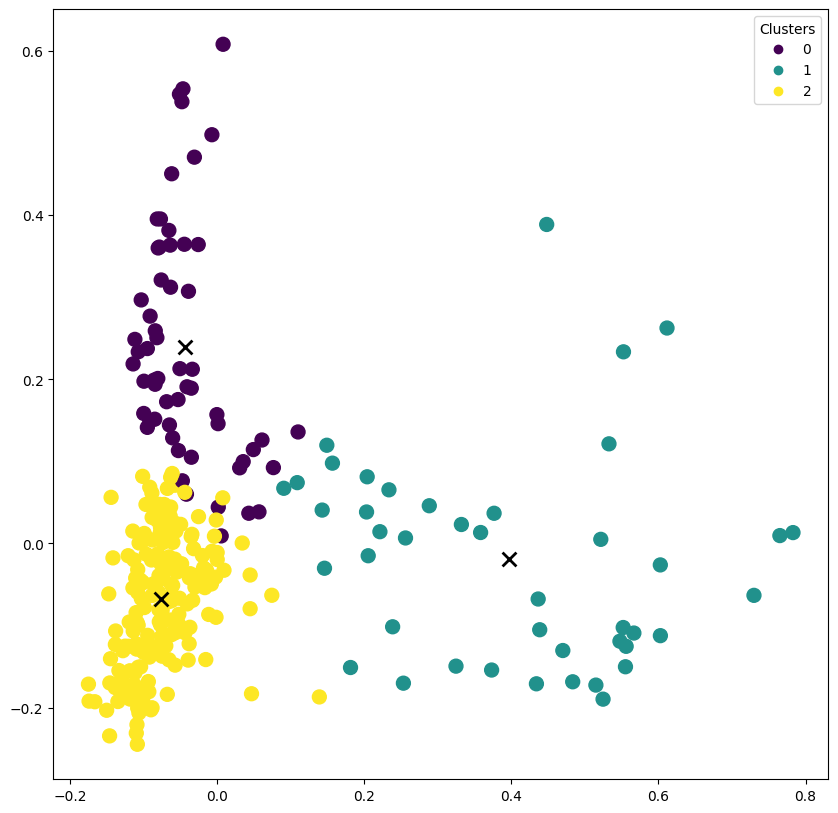

In [118]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")